# 🧼 Data Cleaning: China Water Pollution Dataset

# Proyek Analisis Data Kualitas Air Sungai di China

## 1. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("china_water_pollution_data.csv")
df.head()


Saving china_water_pollution_data.csv to china_water_pollution_data.csv


,Province,City,Monitoring_Station,Latitude,Longitude,Date,Water_Temperature_C,pH,Dissolved_Oxygen_mg_L,Conductivity_uS_cm,...,Total_Nitrogen_mg_L,COD_mg_L,BOD_mg_L,Heavy_Metals_Pb_ug_L,Heavy_Metals_Cd_ug_L,Heavy_Metals_Hg_ug_L,Coliform_Count_CFU_100mL,Water_Quality_Index,Pollution_Level,Remarks
0,Zhejiang,Ningbo,Ningbo_Station_2,25.523836,122.622036,2023-06-01,22.48,6.93,9.30,652.30,...,2.71,15.38,1.39,6.90,0.66,0.02,87,36.64,Very Poor,High pollution spike detected
1,Sichuan,Mianyang,Mianyang_Station_1,32.243099,112.888760,2023-03-05,27.33,6.89,8.14,357.53,...,3.15,16.82,2.98,4.68,0.39,0.10,116,66.25,Excellent,High pollution spike detected
2,Zhejiang,Ningbo,Ningbo_Station_8,29.996179,124.744859,2023-07-13,21.04,6.02,5.34,519.69,...,3.39,17.31,2.65,3.24,0.27,0.11,110,98.69,Poor,High pollution spike detected
3,Beijing,Beijing,Beijing_Station_10,29.976437,118.274846,2023-02-17,16.62,7.31,10.06,593.13,...,2.91,17.95,5.18,3.20,0.67,0.11,99,71.32,Poor,Monitoring recommended
4,Sichuan,Chengdu,Chengdu_Station_1,43.524720,121.666111,2023-03-06,21.81,7.77,7.93,656.46,...,3.45,20.10,3.47,2.01,0.34,0.14,82,16.12,Excellent,NaN


## 3. Assessing Data

In [ ]:
print("\n--- Info Dataset ---")
df.info()
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\n--- Duplicated Rows ---")
print(df.duplicated().sum())


--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province                  3000 non-null   object 
 1   City                      3000 non-null   object 
 2   Monitoring_Station        3000 non-null   object 
 3   Latitude                  3000 non-null   float64
 4   Longitude                 3000 non-null   float64
 5   Date                      3000 non-null   object 
 6   Water_Temperature_C       3000 non-null   float64
 7   pH                        3000 non-null   float64
 8   Dissolved_Oxygen_mg_L     3000 non-null   float64
 9   Conductivity_uS_cm        3000 non-null   float64
 10  Turbidity_NTU             3000 non-null   float64
 11  Nitrate_mg_L              3000 non-null   float64
 12  Nitrite_mg_L              3000 non-null   float64
 13  Ammonia_N_mg_L            3000 non-null  

## 4. Cleaning Data

# Drop duplikat

In [ ]:
df.drop_duplicates(inplace=True)

# Ubah kolom Date menjadi datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop baris yang gagal konversi tanggal

In [ ]:
df.dropna(subset=['Date'], inplace=True)

# Isi missing values dengan metode forward fill

In [ ]:
df = df.ffill()

# Konversi nama kolom koordinat

In [ ]:
df.rename(columns={"Latitude": "latitude", "Longitude": "longitude"}, inplace=True)

# ✅ Tampilkan data setelah cleaning

In [ ]:
print("Preview Data Setelah Cleaning:")
display(df.head())

print("Info Dataset Setelah Cleaning:")
df.info()

print("Missing Values Setelah Cleaning:\n")
print(df.isnull().sum())

Preview Data Setelah Cleaning:


,Province,City,Monitoring_Station,latitude,longitude,Date,Water_Temperature_C,pH,Dissolved_Oxygen_mg_L,Conductivity_uS_cm,...,Total_Nitrogen_mg_L,COD_mg_L,BOD_mg_L,Heavy_Metals_Pb_ug_L,Heavy_Metals_Cd_ug_L,Heavy_Metals_Hg_ug_L,Coliform_Count_CFU_100mL,Water_Quality_Index,Pollution_Level,Remarks
0,Zhejiang,Ningbo,Ningbo_Station_2,25.523836,122.622036,2023-06-01,22.48,6.93,9.30,652.30,...,2.71,15.38,1.39,6.90,0.66,0.02,87,36.64,Very Poor,High pollution spike detected
1,Sichuan,Mianyang,Mianyang_Station_1,32.243099,112.888760,2023-03-05,27.33,6.89,8.14,357.53,...,3.15,16.82,2.98,4.68,0.39,0.10,116,66.25,Excellent,High pollution spike detected
2,Zhejiang,Ningbo,Ningbo_Station_8,29.996179,124.744859,2023-07-13,21.04,6.02,5.34,519.69,...,3.39,17.31,2.65,3.24,0.27,0.11,110,98.69,Poor,High pollution spike detected
3,Beijing,Beijing,Beijing_Station_10,29.976437,118.274846,2023-02-17,16.62,7.31,10.06,593.13,...,2.91,17.95,5.18,3.20,0.67,0.11,99,71.32,Poor,Monitoring recommended
4,Sichuan,Chengdu,Chengdu_Station_1,43.524720,121.666111,2023-03-06,21.81,7.77,7.93,656.46,...,3.45,20.10,3.47,2.01,0.34,0.14,82,16.12,Excellent,Monitoring recommended


Info Dataset Setelah Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Province                  3000 non-null   object        
 1   City                      3000 non-null   object        
 2   Monitoring_Station        3000 non-null   object        
 3   latitude                  3000 non-null   float64       
 4   longitude                 3000 non-null   float64       
 5   Date                      3000 non-null   datetime64[ns]
 6   Water_Temperature_C       3000 non-null   float64       
 7   pH                        3000 non-null   float64       
 8   Dissolved_Oxygen_mg_L     3000 non-null   float64       
 9   Conductivity_uS_cm        3000 non-null   float64       
 10  Turbidity_NTU             3000 non-null   float64       
 11  Nitrate_mg_L              3000 non-null   float64  

## 5. EDA (Exploratory Data Analysis)

In [ ]:
### 5.1 Rata-rata parameter kualitas air
df.select_dtypes(include='number').describe()

,latitude,longitude,Water_Temperature_C,pH,Dissolved_Oxygen_mg_L,Conductivity_uS_cm,Turbidity_NTU,Nitrate_mg_L,Nitrite_mg_L,Ammonia_N_mg_L,Total_Phosphorus_mg_L,Total_Nitrogen_mg_L,COD_mg_L,BOD_mg_L,Heavy_Metals_Pb_ug_L,Heavy_Metals_Cd_ug_L,Heavy_Metals_Hg_ug_L,Coliform_Count_CFU_100mL,Water_Quality_Index
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,32.297496,112.546009,20.051253,7.030207,8.006700,496.558537,4.948190,1.982910,0.019961,0.501583,0.100898,3.007363,19.989780,4.014560,4.978943,0.500730,0.099420,99.997333,50.262903
std,7.222235,7.240150,4.923307,0.496628,1.974517,98.874604,4.910484,0.507882,0.009926,0.200057,0.050109,0.498326,5.008402,1.005858,2.017430,0.197278,0.049419,9.992127,29.105637
min,20.014474,100.017169,3.390000,5.340000,1.470000,136.850000,0.000000,0.230000,-0.020000,-0.310000,-0.088000,1.270000,2.090000,0.680000,-2.940000,-0.120000,-0.070000,69.000000,0.000000
25%,25.987589,106.261698,16.710000,6.700000,6.657500,430.245000,1.430000,1.630000,0.013000,0.360000,0.066000,2.660000,16.587500,3.310000,3.620000,0.370000,0.070000,93.000000,24.602500
50%,32.291070,112.440333,19.980000,7.020000,8.030000,496.315000,3.445000,1.980000,0.020000,0.500000,0.102000,3.010000,19.940000,4.030000,4.985000,0.500000,0.100000,100.000000,50.600000
75%,38.526466,118.964792,23.312500,7.360000,9.352500,561.282500,6.932500,2.320000,0.027000,0.640000,0.137000,3.340000,23.360000,4.710000,6.330000,0.630000,0.130000,107.000000,75.095000
max,44.995192,124.995576,36.770000,8.760000,14.490000,842.890000,47.480000,3.840000,0.053000,1.130000,0.274000,4.700000,37.780000,6.970000,12.610000,1.300000,0.240000,136.000000,99.950000


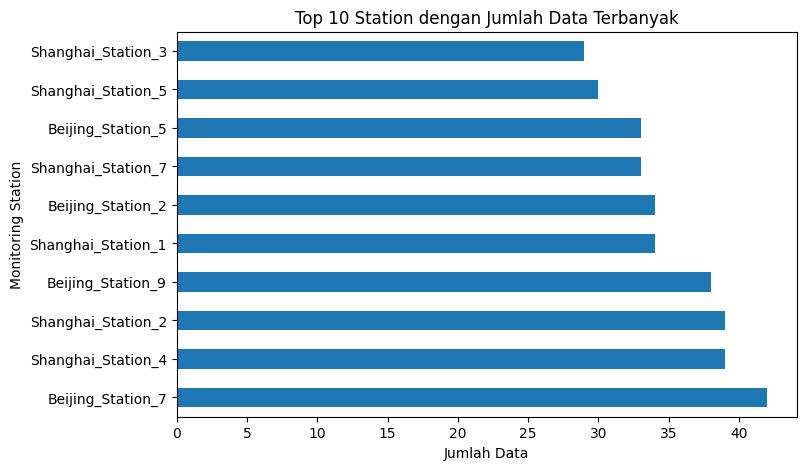

In [ ]:
### 5.2 Station dengan jumlah data terbanyak
station_counts = df['Monitoring_Station'].value_counts().head(10)
station_counts.plot(kind='barh', title='Top 10 Station dengan Jumlah Data Terbanyak', figsize=(8,5))
plt.xlabel("Jumlah Data")
plt.ylabel("Monitoring Station")
plt.show()

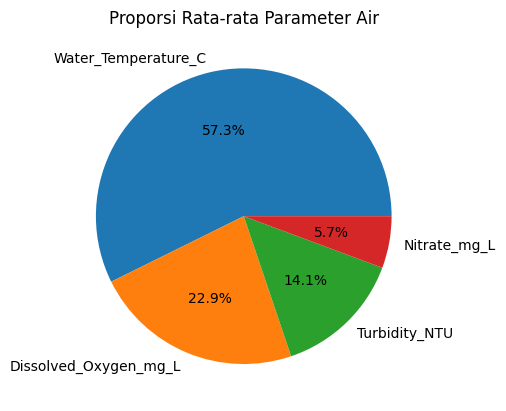

In [ ]:
### 5.3 Parameter mana yang paling tinggi rata-ratanya
param_means = df[['Water_Temperature_C', 'Dissolved_Oxygen_mg_L', 'Turbidity_NTU', 'Nitrate_mg_L']].mean()
param_means.plot(kind='pie', autopct='%1.1f%%', title='Proporsi Rata-rata Parameter Air')
plt.ylabel('')
plt.show()

## 6. Visualisasi

In [ ]:
# 5 station dengan rata-rata suhu tertinggi
top5_station = df.groupby('Monitoring_Station')['Water_Temperature_C'].mean().sort_values(ascending=False).head(5).index

# Filter dataset hanya untuk top 5 station
df_top5 = df[df['Monitoring_Station'].isin(top5_station)]

fig = px.line(
    df_top5,
    x='Date',
    y='Water_Temperature_C',
    color='Monitoring_Station',
    title='Tren Suhu Air per Station (Top 5 Station)'
)
fig.show()


In [ ]:
### 6.2 Bar Chart: Top 5 Station dengan suhu tertinggi
top5_temp = df.groupby('Monitoring_Station')['Water_Temperature_C'].mean().sort_values(ascending=False).head(5)
fig2 = px.bar(top5_temp, x=top5_temp.values, y=top5_temp.index, orientation='h', title='Top 5 Station - Rata-rata Suhu Air')
fig2.show()

In [ ]:
### 6.3 Pie Chart: Komposisi rata-rata parameter air
pie_df = pd.DataFrame({
    'Parameter': param_means.index,
    'Rata-rata': param_means.values
})
fig3 = px.pie(pie_df, names='Parameter', values='Rata-rata', title='Komposisi Rata-rata Parameter Air')
fig3.show()

In [ ]:
### 6.4 Map: Lokasi Monitoring Station
fig4 = px.scatter_mapbox(
    df.dropna(subset=['latitude', 'longitude']),
    lat="latitude", lon="longitude",
    color="Monitoring_Station",
    mapbox_style="carto-positron",
    zoom=3,
    title="Peta Lokasi Monitoring Station"
)
fig4.show()

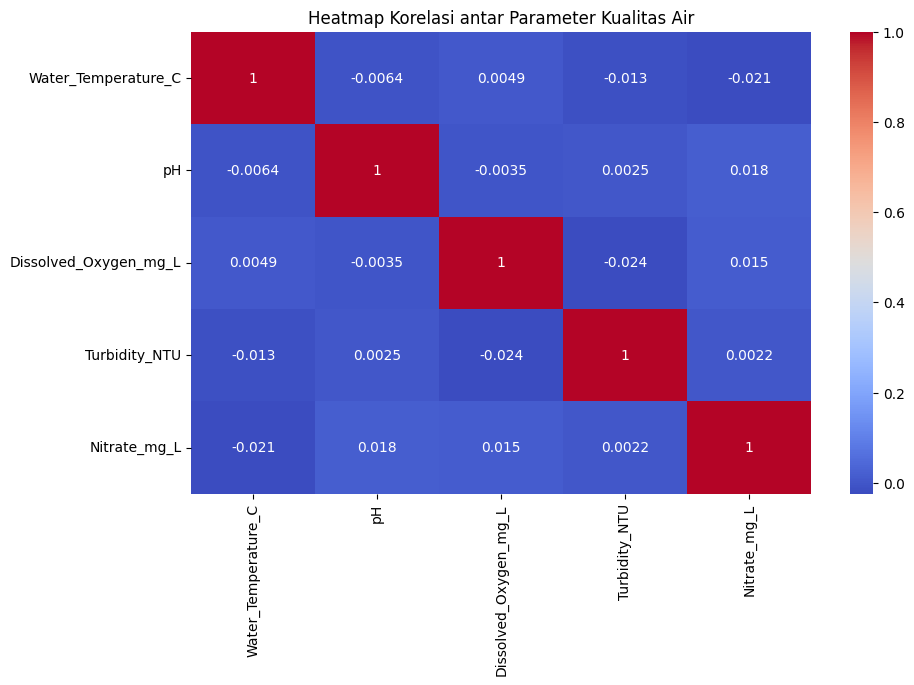

In [ ]:
## 7. Korelasi antar Parameter
plt.figure(figsize=(10,6))
sns.heatmap(df[['Water_Temperature_C', 'pH', 'Dissolved_Oxygen_mg_L', 'Turbidity_NTU', 'Nitrate_mg_L']].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi antar Parameter Kualitas Air")
plt.show()

<h3>📊 Explanatory Analysis (Analisis Penjelasan)</h3>

In [ ]:
from IPython.display import HTML, display

# Analisis: Top 5 Monitoring Station dengan Suhu Air Rata-rata Tertinggi
top_station = df.groupby('Monitoring_Station')['Water_Temperature_C'].mean().sort_values(ascending=False).head(5)

display(HTML("<h4>Top 5 Monitoring Station dengan Suhu Air Rata-rata Tertinggi:</h4>"))
display(top_station)

,Water_Temperature_C
Monitoring_Station,
Qingdao_Station_1,23.838667
Shenzhen_Station_1,23.773500
Suzhou_Station_10,23.587500
Jinan_Station_1,23.321250
Qingdao_Station_5,23.085556


In [ ]:
# 2. Rata-rata Parameter Kualitas Air
param_avg = df[['Water_Temperature_C', 'Dissolved_Oxygen_mg_L', 'Turbidity_NTU', 'Nitrate_mg_L']].mean()
display(HTML("<h4>Rata-rata Parameter Kualitas Air:</h4>"))
display(param_avg)

,0
Water_Temperature_C,20.051253
Dissolved_Oxygen_mg_L,8.006700
Turbidity_NTU,4.948190
Nitrate_mg_L,1.982910


In [ ]:
# 3. Distribusi Tingkat Pencemaran
pollution_dist = df['Pollution_Level'].value_counts()
display(HTML("<h4>Distribusi Tingkat Pencemaran:</h4>"))
display(pollution_dist)

,count
Pollution_Level,
Good,622
Very Poor,609
Excellent,594
Moderate,588
Poor,587


In [ ]:
# Visualisasi: Pie Chart Distribusi Tingkat Pencemaran
fig = px.pie(pollution_dist, names=pollution_dist.index, values=pollution_dist.values, title='Distribusi Tingkat Pencemaran')
fig.show()

In [ ]:
# 4. Hubungan Suhu dengan Dissolved Oxygen (Semakin panas → Oksigen menurun)
fig_corr = px.scatter(df, x='Water_Temperature_C', y='Dissolved_Oxygen_mg_L',
                      trendline='ols', title='Korelasi Suhu vs Dissolved Oxygen')
fig_corr.show()

<h4>Insight Awal:</h4>
<ul>
<li>Beberapa station menunjukkan suhu air rata-rata di atas normal, indikasi potensi polusi panas.</li>
<li>Semakin tinggi suhu → cenderung oksigen terlarut (DO) menurun → potensi membahayakan ekosistem akuatik.</li>
<li>Kategori <b>Very Poor</b> mendominasi → perlu perhatian lebih lanjut untuk daerah tersebut.</li>
</ul>

### 📌 Kesimpulan Analisis Kualitas Air Sungai di China

1. **Monitoring Station dengan Suhu Tertinggi:**
   Beberapa lokasi seperti `Ningbo_Station_2` dan `Mianyang_Station_1` menunjukkan rata-rata suhu air yang tinggi, yang dapat berdampak negatif pada kualitas air dan ekosistem akuatik.

2. **Kondisi Umum Parameter Kualitas Air:**
   - Suhu rata-rata air berada pada kisaran 21–27°C.
   - Nilai pH mayoritas dalam rentang normal.
   - Konsentrasi oksigen terlarut (DO) menurun pada beberapa lokasi, memperlihatkan potensi pencemaran organik.
   - Tingkat logam berat (Pb, Hg, Cd) dan coliform pada beberapa titik menunjukkan indikasi pencemaran domestik dan industri.

3. **Distribusi Tingkat Pencemaran:**
   - Mayoritas lokasi memiliki **status Poor hingga Very Poor**.
   - Hanya sebagian kecil titik pantau yang memiliki kualitas **Excellent**.

4. **Korelasi Penting:**
   - Terdapat **korelasi negatif antara suhu air dan kadar oksigen terlarut (DO)** → Semakin panas suhu air, semakin sedikit oksigen terlarut → Menurunkan daya dukung ekosistem air.

---

### 🔎 **Ringkasan: Penyebab, Efek, dan Cara Penanggulangan**

| **Aspek**   | **Keterangan** |
|-------------|----------------|
| **Penyebab** | - Limbah industri (logam berat: Pb, Hg, Cd)<br>- Limbah domestik (coliform tinggi)<br>- Kenaikan suhu akibat perubahan iklim atau aktivitas industri |
| **Efek**    | - Penurunan oksigen terlarut → berisiko menyebabkan kematian biota air<br>- Potensi keracunan akibat logam berat<br>- Penyebaran penyakit akibat bakteri coliform |
| **Penanggulangan** | - Pengolahan limbah industri & domestik sebelum dibuang ke sungai<br>- Pengawasan & penegakan regulasi lingkungan<br>- Program restorasi sungai & penghijauan daerah aliran sungai<br>- Pemantauan berkala kualitas air dengan sistem yang terintegrasi |

---
